In [1]:
import pandas as pd
import numpy as np
%matplotlib inline


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [66]:
df=pd.read_csv('../Data/RestaurantVisitors.csv',index_col='date',parse_dates=True)
df.index.freq='D'

In [5]:
df.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [6]:
df.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN
2017-05-30,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-31,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN


In [7]:
df1=df.dropna()

In [8]:
df1.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-18,Tuesday,0,na,30.0,30.0,13.0,18.0,91.0
2017-04-19,Wednesday,0,na,20.0,11.0,30.0,18.0,79.0
2017-04-20,Thursday,0,na,22.0,3.0,19.0,46.0,90.0
2017-04-21,Friday,0,na,38.0,53.0,36.0,38.0,165.0
2017-04-22,Saturday,0,na,97.0,20.0,50.0,59.0,226.0


In [9]:
df1.columns

Index(['weekday', 'holiday', 'holiday_name', 'rest1', 'rest2', 'rest3',
       'rest4', 'total'],
      dtype='object')

In [11]:
cols=['rest1', 'rest2', 'rest3','rest4', 'total']
for col in cols:
    df1[col]=df1[col].astype(int)

In [12]:
df1.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65,25,67,139,296
2016-01-02,Saturday,0,na,24,39,43,85,191
2016-01-03,Sunday,0,na,24,31,66,81,202
2016-01-04,Monday,0,na,23,18,32,32,105
2016-01-05,Tuesday,0,na,2,15,38,43,98


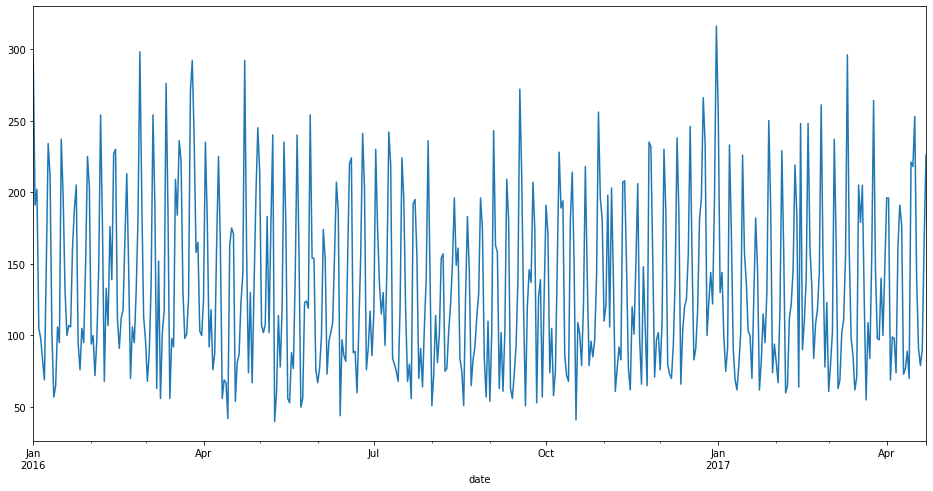

In [13]:
df1['total'].plot(figsize=(16,8))

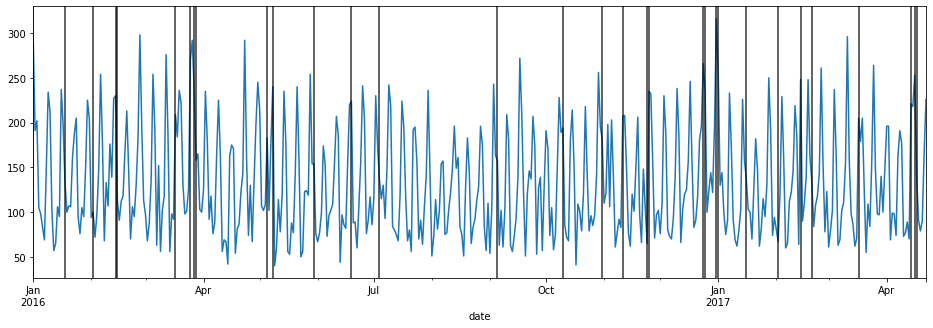

In [15]:
ax=df1['total'].plot(figsize=(16,5))#df1[df1['holiday']==1].index
for day in df1.query('holiday==1').index:
    ax.axvline(x=day,color='black',alpha=0.8)
                                                        

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

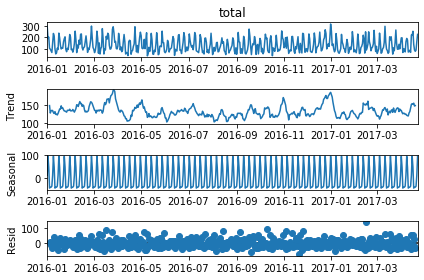

In [17]:
result=seasonal_decompose(df1['total'])
result.plot(); #strong seasonal component and some trend

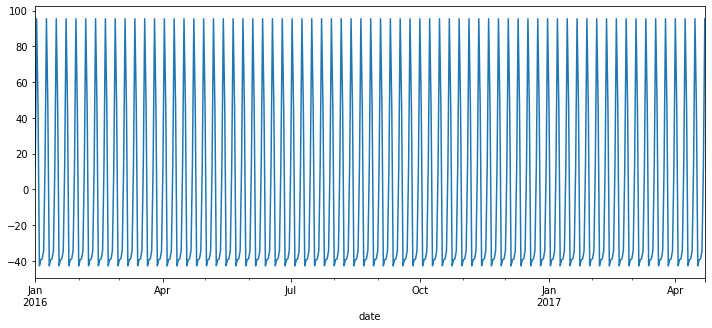

In [18]:
result.seasonal.plot(figsize=(12,5)) #weekly  seasonality

In [19]:
train=df1.iloc[:436]
test=df1.iloc[436:]

In [20]:
from pmdarima import auto_arima

In [21]:
auto_arima(df1['total'],seasonal=True,m=7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                  478
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2384.969
Date:                   Sun, 17 May 2020   AIC                           4777.937
Time:                           17:53:56   BIC                           4794.616
Sample:                                0   HQIC                          4784.495
                                   - 478                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.5497      1.628      2.795      0.005       1.359       7.740
ar.S.L7        0.9627      0.013     74.315      0.000       0.937       0.988
ma.S.L7       -0.7680      0.048    -15.838      0.000      -0.863      -0.673
sigma2      1229.7926     73.728     16.680      0.000    1085.288    1374.297
===================================================================================
Ljung-Box (Q):                       69.27   Jarque-Bera (JB):                68.68
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                             0.77
Prob(H) (two-sided):                  0.29   Kurtosis:                         4.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [23]:
#valueerror:non invertible starting MA parameter found in order to not get this error we give the enforce_invertibilty as False
model=SARIMAX(train['total'],order=(1,0,0),seasonal_order=(2,0,0,7),enforce_invertibility=False)


In [24]:
result=model.fit()

In [25]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood               -2224.701
Date:                           Sun, 17 May 2020   AIC                           4457.403
Time:                                   17:59:43   BIC                           4473.713
Sample:                               01-01-2016   HQIC                          4463.840
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2212      0.047      4.711      0.000       0.129       0.313
ar.S.L7        0.5063      0.036     14.187      0.000       0.436       0.576
ar.S.L14       0.4574      0.037     12.379      0.000       0.385       0.530
sigma2      1520.2899     82.277     18.478      0.000    1359.029    1681.550
===================================================================================
Ljung-Box (Q):                       83.96   Jarque-Bera (JB):                29.23
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.34
Prob(H) (two-sided):                  0.37   Kurtosis:                         4.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
start=len(train)
end=len(train)+len(test)-1

In [27]:
pred=result.predict(start,end).rename('SARIMA model')

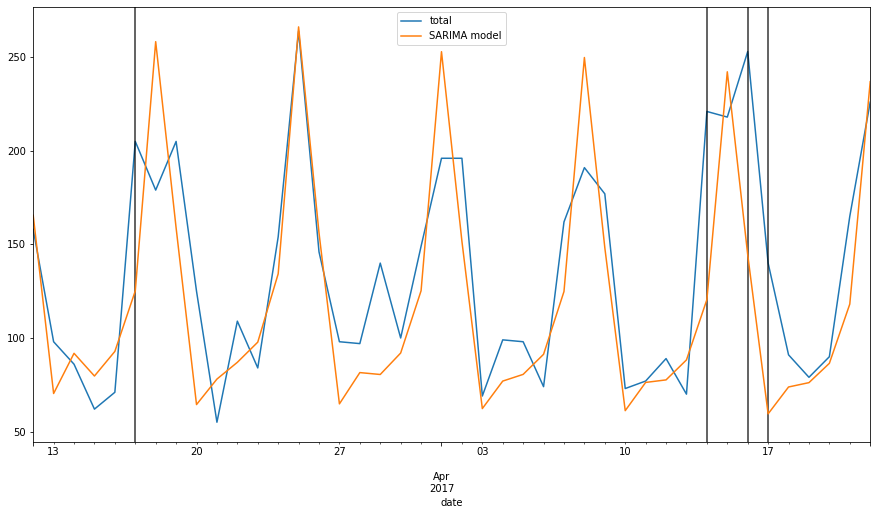

In [29]:
ax=test['total'].plot(figsize=(15,8),legend=True)
for day in test.query('holiday==1').index:
    ax.axvline(x=day,color='black',alpha=0.8)
pred.plot(legend=True)

In [30]:
from statsmodels.tools.eval_measures import rmse

In [31]:
rmse(test['total'],pred)

41.2631549339802

In [32]:
test['total'].mean() #its an ok model not the best need to consider the holiday factor

134.26190476190476

# SARIMAX

In [33]:
auto_arima(df1['total'],exogenous=df1[['holiday']],seasonal=True,m=7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  478
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 7)   Log Likelihood               -2353.025
Date:                             Sun, 17 May 2020   AIC                           4718.050
Time:                                     18:11:47   BIC                           4743.068
Sample:                                 01-01-2016   HQIC                          4727.886
                                      - 04-22-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     11.6560      2.980      3.911      0.000       5.815      17.497
holiday       35.7583      5.471      6.535      0.000      25.034      46.482
ar.L1          0.1636      0.058      2.817      0.005       0.050       0.277
ar.S.L7        0.9001      0.024     36.916      0.000       0.852       0.948
ma.S.L7       -0.5176      0.072     -7.218      0.000      -0.658      -0.377
sigma2      1351.2049    116.437     11.605      0.000    1122.992    1579.418
===================================================================================
Ljung-Box (Q):                       62.40   Jarque-Bera (JB):                11.85
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                             0.37
Prob(H) (two-sided):                  0.45   Kurtosis:                         3.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
#train our x model

In [35]:
model=SARIMAX(train['total'],exog=train[['holiday']],order=(1,0,1),seasonal_order=(1,0,1,7),enforce_invertibility=False)

In [36]:
result=model.fit()

In [37]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 7)   Log Likelihood               -2094.001
Date:                           Sun, 17 May 2020   AIC                           4200.002
Time:                                   18:13:21   BIC                           4224.468
Sample:                               01-01-2016   HQIC                          4209.657
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       71.1810      4.186     17.005      0.000      62.977      79.385
ar.L1          0.9998      0.001    898.896      0.000       0.998       1.002
ma.L1         -1.0020      0.006   -167.792      0.000      -1.014      -0.990
ar.S.L7        0.9998      0.000   3241.241      0.000       0.999       1.000
ma.S.L7       -0.9596      0.030    -32.275      0.000      -1.018      -0.901
sigma2       809.3777     48.226     16.783      0.000     714.856     903.899
===================================================================================
Ljung-Box (Q):                       55.02   Jarque-Bera (JB):                24.03
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               1.02   Skew:                             0.27
Prob(H) (two-sided):                  0.89   Kurtosis:                         4.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
pred=result.predict(start,end,exog=test[['holiday']]).rename('SARIMAX with exagenous')

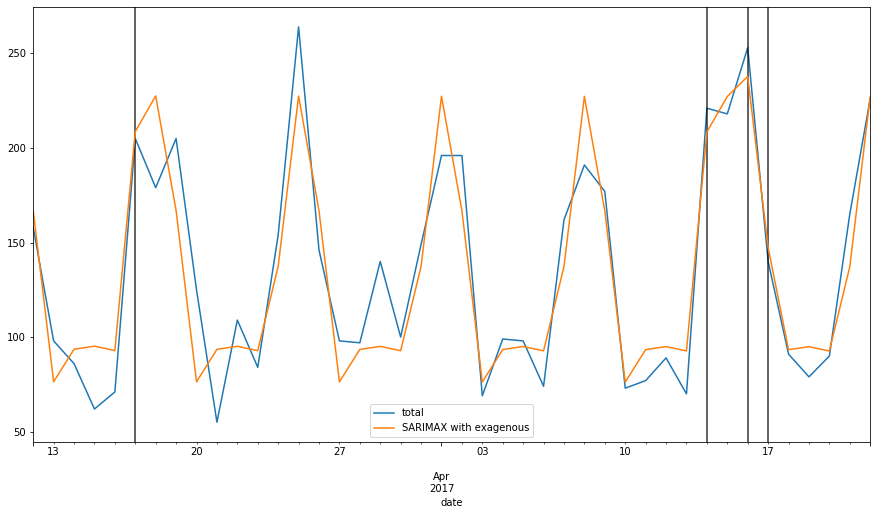

In [41]:
ax=test['total'].plot(figsize=(15,8),legend=True)
for day in test.query('holiday==1').index:
    ax.axvline(x=day,color='black',alpha=0.8)
pred.plot(legend=True)

In [42]:
#better prediction when exagenous paramter is included

In [43]:
rmse(test['total'],pred) #rmse has become half

22.661225463126616

In [61]:
mode=SARIMAX(df1['total'],exog=df1[['holiday']],order=(1,0,1),seasonal_order=(1,0,1,7),enforce_invertibility=False)

In [62]:
reuslts=model.fit()

In [46]:
df.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN
2017-05-30,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-31,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN


In [67]:
exog_for=df[478:]['holiday'] #we need exogenous value to predict the future so from orighinal dataset we are taking that nan values which have the holiday value in it

In [68]:
exog_for.shape

(39,)

In [69]:
478+38

516

In [70]:
fcast=reuslts.predict(478,516,exog=exog_for).rename('final SARIMAX forecast')

ValueError: Provided exogenous values are not of the appropriate shape. Required (81, 1), got (39,).